## Implementation

Running 2D/3D PCA, TSNE and UMAP on then same dataset

In [1]:
# Core
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
import umap
import umap.plot

### Loading data

In [13]:
# Renaming the columns based on their features.
data_path = "../../data/wine_data.csv"

df = pd.read_csv(data_path, header=None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '0.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [15]:
# Renaming the columns based on their features.


columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'od280/od315_of_diluted_wines', 'proline']

df.columns = columns

In [16]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Using the standard scaler method to get the values converted into integers between -3 and +3.
X = df.iloc[:, 1:14].values ## exclude first column (0 index which is label)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## 2D Principal Component Analysis

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'])
                            # Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 640x480 with 0 Axes>

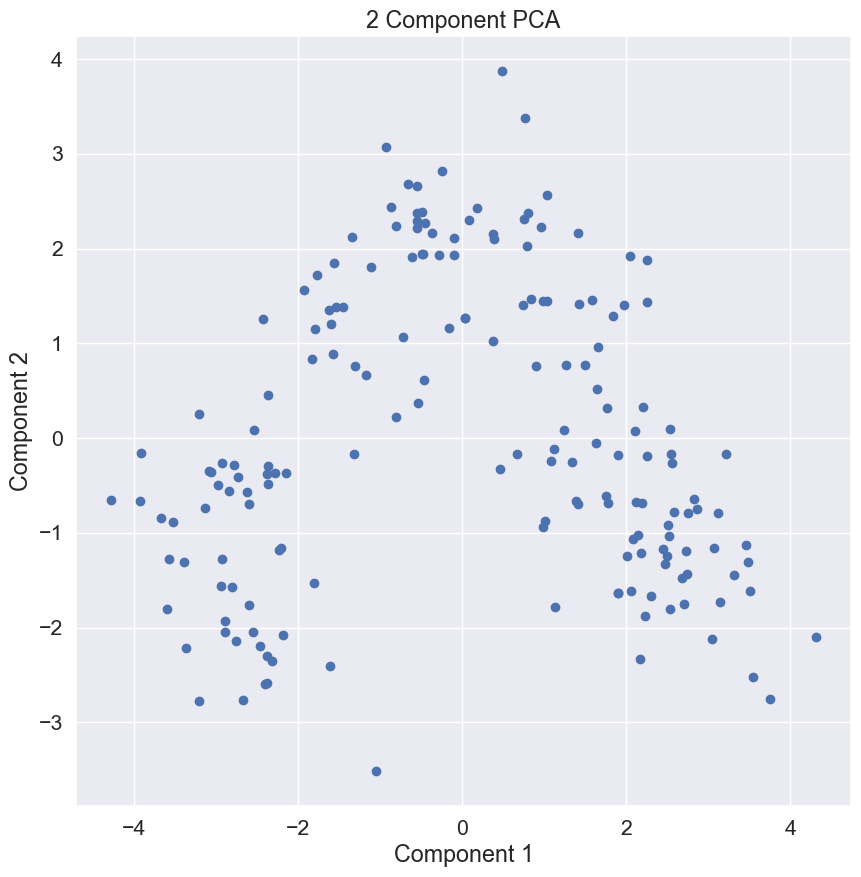

In [21]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

## 3D Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents2 = pca.fit_transform(X)
# Creating a dataframe featuring the three Principal components that we acquired through PCA.
PCA_dataset2 = pd.DataFrame(data = principalComponents2, columns = ['component3', 'component4', 'component5'] )
# Extracting the three features from above in order to add them to the dataframe.
principal_component3 = PCA_dataset2['component3']
principal_component4 = PCA_dataset2['component4']
principal_component5 = PCA_dataset2['component5']

C:\Users\kkiit\AppData\Local\Temp\ipykernel_30684\2320994751.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


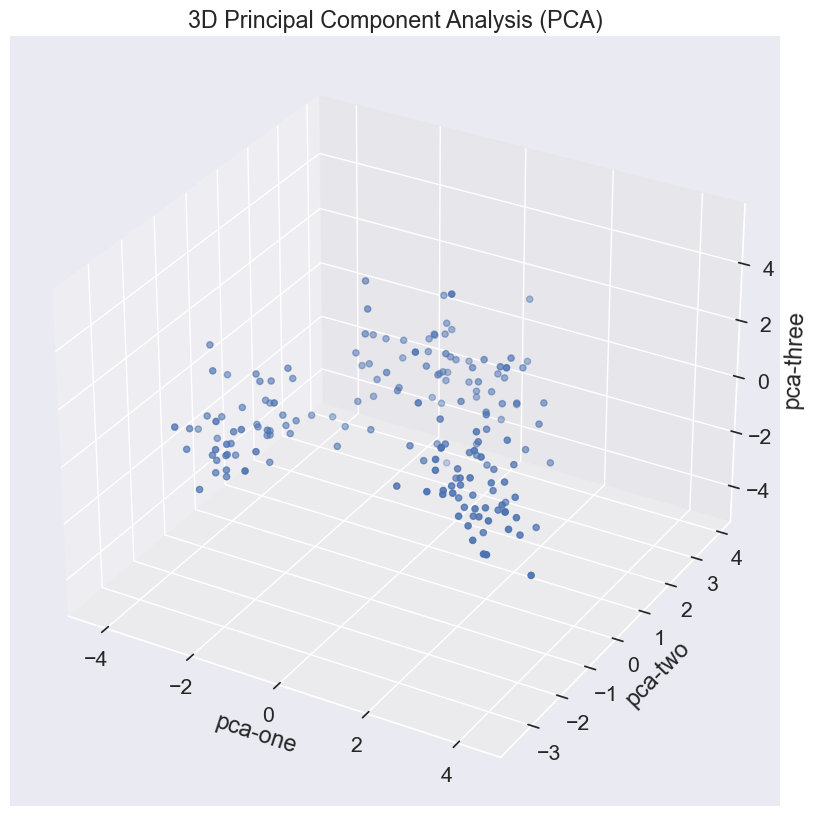

In [24]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## 2D T-distributed Stochastic Neighbour Embedding

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne.fit_transform(X)

C:\Users\kkiit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kkiit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.743996
[t-SNE] KL divergence after 300 iterations: 0.373329


In [26]:
# Creating a dataframe featuring the two principal components that we acquired through t-SNE.
tsne_dataset1 = pd.DataFrame(data = tsne_results1, columns = ['component1', 'component2'] )
tsne_dataset1.head()

# Extracting the two features from above in order to add them to the dataframe.
tsne_component1 = tsne_dataset1['component1']
tsne_component2 = tsne_dataset1['component2']

<Figure size 640x480 with 0 Axes>

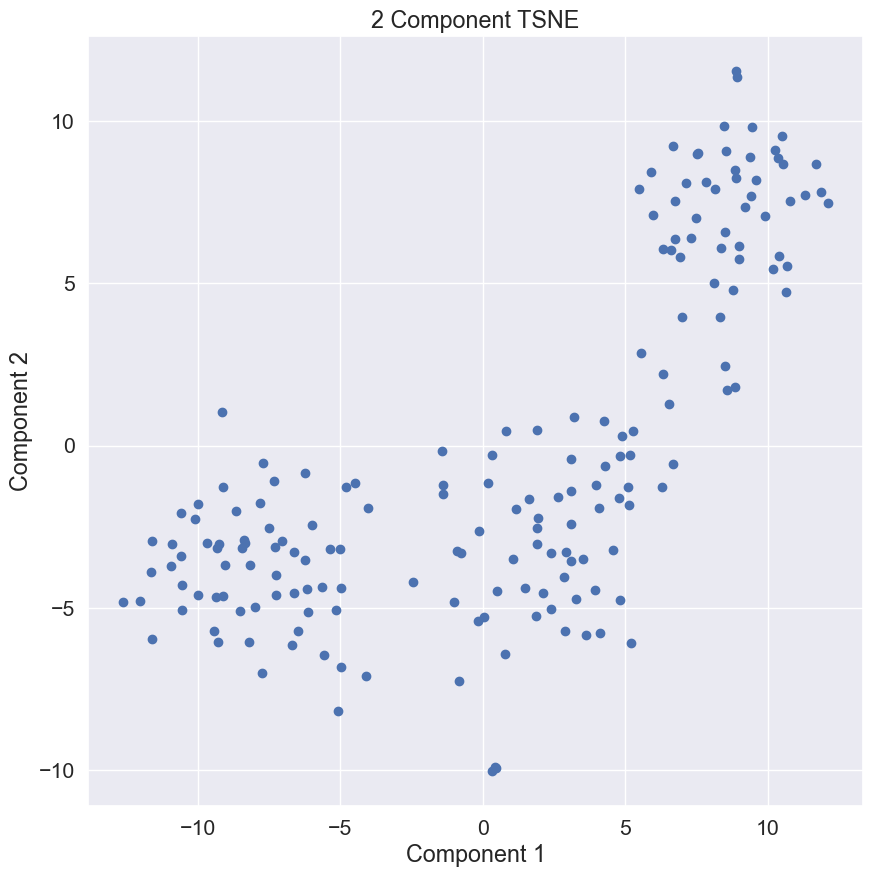

In [27]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_component1, tsne_component2)

## 3D T-distributed Stochastic Neighbour Embedding

In [28]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne.fit_transform(X)

C:\Users\kkiit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kkiit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.839161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 116.093750
[t-SNE] KL divergence after 300 iterations: 2.790810


In [31]:
# Creating a dataframe featuring the three Principal components that we acquired through t-SNE.
tsne_dataset2 = pd.DataFrame(data = tsne_results2, columns = ['component3', 'component4', 'component5'] )
tsne_dataset2.head()

# Extracting the three features from above in order to add them to the dataframe.
tsne_component3 = tsne_dataset2['component3']
tsne_component4 = tsne_dataset2['component4']
tsne_component5 = tsne_dataset2['component5']

C:\Users\kkiit\AppData\Local\Temp\ipykernel_30684\2648427008.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


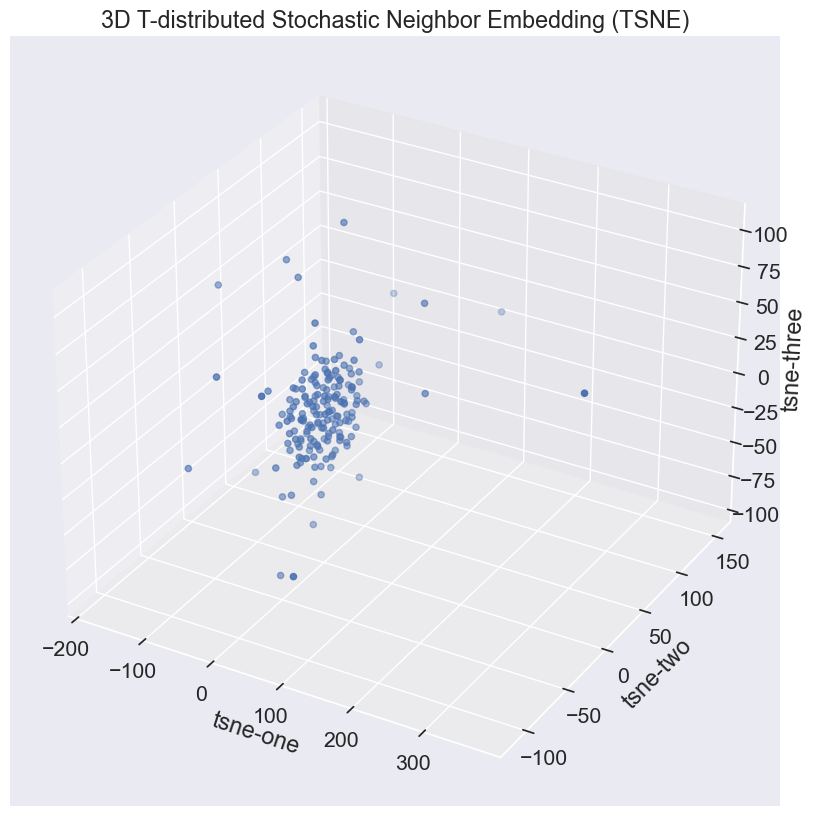

In [32]:
# Visualizing the 3D t-SNE.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D T-distributed Stochastic Neighbor Embedding (TSNE)')
ax.scatter(
    xs=tsne_component3, 
    ys=tsne_component4, 
    zs=tsne_component5, 
    #c = x_kmeans
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

## 2D UMAP

In [33]:
# Implementing UMAP.
import umap
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

In [35]:
embedding.shape

(178, 2)

<Figure size 640x480 with 0 Axes>

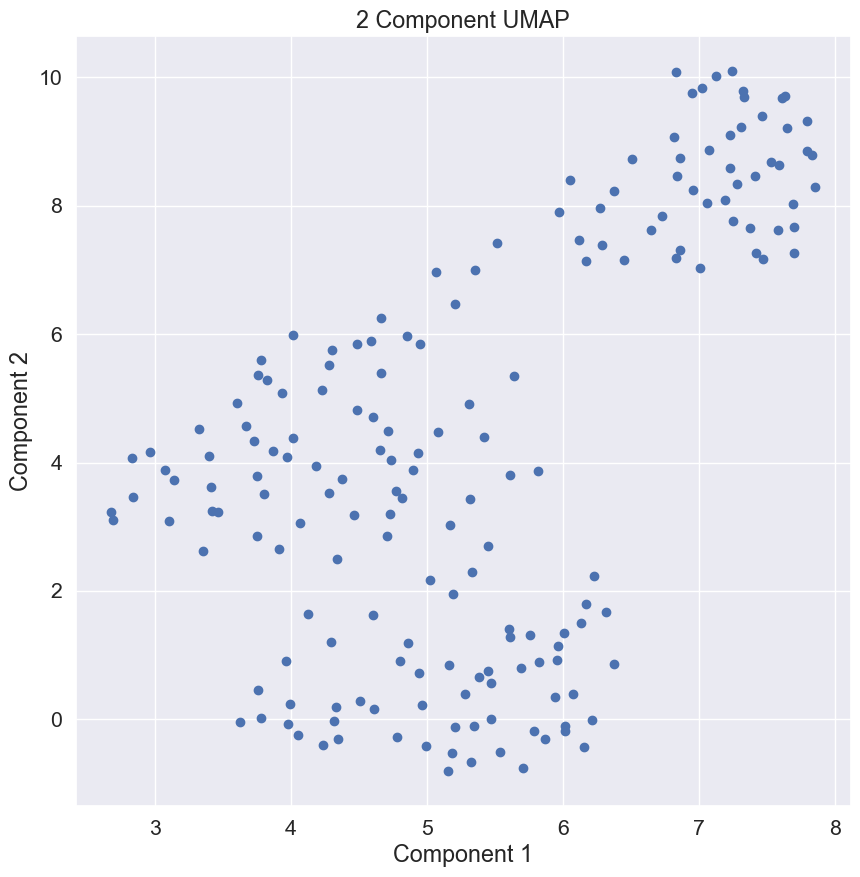

In [34]:
# Visualizing the effects of the Uniform Manifold Approximation and Projection.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

## 3D Uniform Manifold Approximation and Projection

In [36]:
import umap
embedding2 = umap.UMAP(n_components=3,
                      n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

In [37]:
umap_component3 = embedding2[:,0]
umap_component4 = embedding2[:,1]
umap_component5 = embedding2[:,2]

C:\Users\kkiit\AppData\Local\Temp\ipykernel_30684\306716568.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(10,10)).gca(projection='3d')


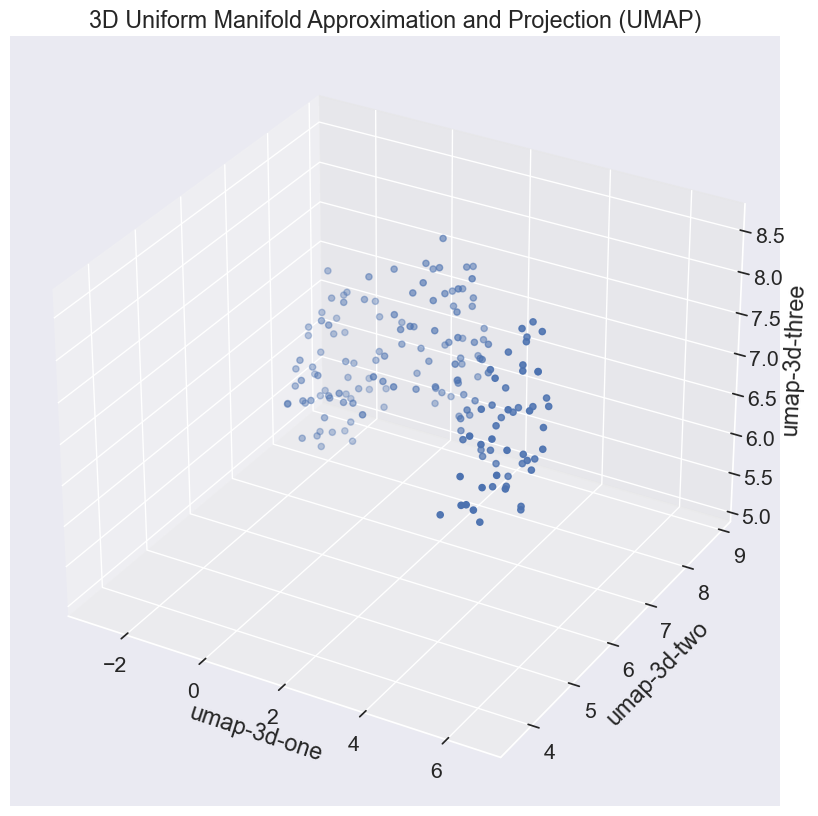

In [38]:
# Visualizing the effects of the 3D UMAP.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Uniform Manifold Approximation and Projection (UMAP)')
ax.scatter(
    xs=umap_component3, 
    ys=umap_component4, 
    zs=umap_component5, 
    #c = x_kmeans
)
ax.set_xlabel('umap-3d-one')
ax.set_ylabel('umap-3d-two')
ax.set_zlabel('umap-3d-three')
plt.show()

## References

https://www.kaggle.com/code/rishidamarla/2d-3d-pca-t-sne-and-umap-on-wine-dataset